We are about to do the Logistic Regression, one of the basic statistical methods. Even though the name says "Regression", its actually a binary classification. So the output is yes or no, 1 or 0, cat or not cat, delay or no delay etc. 

To out learning curve smooth, lets start with something simple.
Lets work with a simple dataset.
And as always, at first we import the essential libraries, Pandas and NumPy.

In [1]:
import pandas as pd
import numpy as np

### **Toy Dataset: Exam Performance Prediction (Binary Classification)**
**Description**: Predict whether a student passes (`1`) or fails (`0`) based on study hours and sleep hours.

```csv
Study_Hours,Sleep_Hours,Pass
1.0,4.0,0
1.5,5.0,0
2.0,6.0,0
2.5,4.5,0
3.0,5.5,0
3.5,7.0,1
4.0,6.5,1
4.5,7.5,1
5.0,8.0,1
5.5,7.0,1
6.0,5.0,0
6.5,8.5,1
7.0,9.0,1
7.5,6.0,1
8.0,9.5,1
8.5,7.5,1
9.0,10.0,1
9.5,5.5,1
10.0,8.5,1
10.5,9.0,1
```

#### **Columns**
- `Study_Hours`: Hours studied (numerical, range: 1.0–10.5)  
- `Sleep_Hours`: Hours slept (numerical, range: 4.0–10.0)  
- `Pass`: Binary label (`0` = Fail, `1` = Pass)  

Lets visualize the data here, to see how it talks to us: 

In [2]:
import numpy as np

# Features (Study Hours, Sleep Hours)
X = np.array([
    [1.0, 4.0], [1.5, 5.0], [2.0, 6.0], [2.5, 4.5], [3.0, 5.5],
    [3.5, 7.0], [4.0, 6.5], [4.5, 7.5], [5.0, 8.0], [5.5, 7.0],
    [6.0, 5.0], [6.5, 8.5], [7.0, 9.0], [7.5, 6.0], [8.0, 9.5],
    [8.5, 7.5], [9.0, 10.0], [9.5, 5.5], [10.0, 8.5], [10.5, 9.0]
])

# Labels (0 = Fail, 1 = Pass)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

print("Features (X):\n", X)
print("Labels (y):", y)

Features (X):
 [[ 1.   4. ]
 [ 1.5  5. ]
 [ 2.   6. ]
 [ 2.5  4.5]
 [ 3.   5.5]
 [ 3.5  7. ]
 [ 4.   6.5]
 [ 4.5  7.5]
 [ 5.   8. ]
 [ 5.5  7. ]
 [ 6.   5. ]
 [ 6.5  8.5]
 [ 7.   9. ]
 [ 7.5  6. ]
 [ 8.   9.5]
 [ 8.5  7.5]
 [ 9.  10. ]
 [ 9.5  5.5]
 [10.   8.5]
 [10.5  9. ]]
Labels (y): [0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [3]:
df = pd.DataFrame({
    'Study_Hours': X[:, 0],  # First column of X
    'Sleep_Hours': X[:, 1],  # Second column of X
    'Pass': y
})

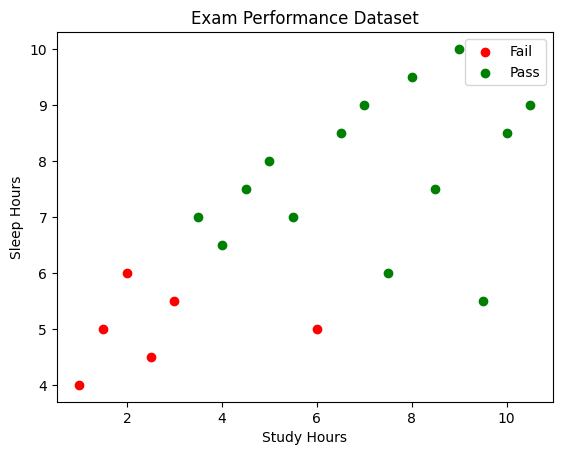

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Fail')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Pass')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.title('Exam Performance Dataset')
plt.show()

<Axes: xlabel='Study_Hours', ylabel='Sleep_Hours'>

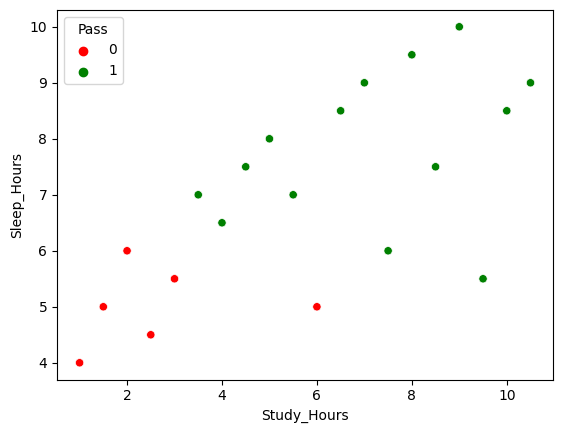

In [5]:
import seaborn as sns
sns.scatterplot(data=df, x='Study_Hours', y='Sleep_Hours', hue='Pass', palette=['red', 'green'])

Hmm, it's pretty easy. Because it's made up. We can almost divide the 0 and 1 simply by drawing a line between them. Lets see how that works. 

As we said before, we can try to draw a straight line and separate the reds from greens. Lets take that approach.
If we want to draw a line, we need a line's equation. The simplest equation we have is:

$$Y = ax + b$$

where, "a" is the slope of "x", the input variable. And "b" is the bias. "a" decide the rate of change in Y from x, and "b" is the headstart, or how much elevation we get.
Now, we need to find Y, and Y isn't exactly ax + b. We have to apply a function to get Y. It's more like $$Y = some_function(ax + b)$$
Let's take a another variable z, z = ax+b. Later we can get the value of Y from z.  
One more problem, we have two different values of x here. The "study hours" and the "sleep hours".
We can work with that. Essentialy, we have to assume that study hours and sleep hours dont affect result similarly. Probably study hour is more important? And sleep hour is not that important? But we can not run on 0 hour of sleep, can we?
So, these two independant variable, x1 (study hour), and x2(sleep hour) should be "weighted" differently. 
Here, weights = [w1, w2]
So, $$z = w1 * x1 + w2 * x2 + b$$

In [6]:
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

X_bias is an array that consist of b, x1, x2.

We are going to split the dataset into train and test part. Our regression will learn from train set, and test the hypothesis on the test set.
We are doing 80% 20% split here.

In [7]:
np.random.shuffle(X_bias) #shuffling the dataset

In [8]:
train_size = int(len(X_bias) * 0.8)  # 80% of the total length
train_set = X_bias[:train_size]  # First 80% of elements
test_set = X_bias[train_size:]  # Remaining 20% of elements

We are initializing weight array.

In [9]:
w = np.zeros(X_bias.shape[1])  # Shape: (3,) for [bias, w1, w2]

Remeber when we said we need to put "z" through some function to get "Y"? We have to make that function now. That function is sigmoid function. Its a function that maps real number values to 0 or 1. That means, we send some "z", we get some 0 or 1, and those values are "y".

The sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


now we are going to implement the function here.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now, the weight and bias we initiated randomly, aren't necessarily accurate. We need to change that. In fact, we need to change it a lot of times till it gives us a line that's the perfect fit. If not, it should be near perfect. Also, the need to see the cost or the error. Error is the difference of the real value of y and the hypothetical value of y. Here, the cost function is 
$$J(w) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log a^{(i)} + (1 - y^{(i)}) \log (1 - a^{(i)}) \right]$$
where:
- \( m \) is the number of training examples.
- \( y^{(i)} \) is the actual label (0 or 1).
- \( a^{(i)} \) is the predicted probability from the sigmoid function.

We have to update the weights till we find the optimal weights. That means, we have to find the perfect or near perfect w1, w2 weights for variable x1, x2 to plug into the equation.

### Gradient Descent Formula

The weight update rule in gradient descent is:

$$ w := w - \alpha \frac{\partial J}{\partial w} $$

where:
- \( w \) represents the weights.
- \( \alpha \) is the learning rate.
- \( \frac{\partial J}{\partial w} \) is the gradient of the cost function with respect to \( w \).

For logistic regression, the gradient descent update for weights and bias is:

$$ w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} X^{(i)} (A^{(i)} - Y^{(i)}) $$

$$ b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (A^{(i)} - Y^{(i)}) $$

where:
- \( m \) is the number of training examples.
- \( X^{(i)} \) is the input feature vector.
- \( A^{(i)} \) is the predicted probability from the sigmoid function.
- \( Y^{(i)} \) is the actual label.


We will adjust the weights 1000 times. These attempts are called epochs. 


### What Happens in One Epoch: ###


*Forward Pass:* Compute predictions (A) and cost for all 20 examples.

In [11]:
def forward(X, w):
    z = np.dot(X, w)
    A = sigmoid(z)  # Predicted probabilities
    J = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))  # Cross-entropy cost
    return A, J

*Backward Pass:* Calculate the gradient (dw) by averaging contributions from all examples.

In [12]:
def backward(X, A, y):
    dw = np.dot(X.T, (A - y)) / len(y)  # Gradient for weights
    return dw

*Update Weights:* Adjust w using the gradient: $$w = w - \alpha * dw.$$
Here, $$\alpha$$ is the learning rate.

We have the liberty to choose the learning rate. But we should be careful, since with smaller learning rate, we need way more epochs and if we set it too big, we might cross the optimal point.

In [13]:
alpha = 0.01  # Learning rate
epochs = 1000

for epoch in range(epochs):
    A, cost = forward(X_bias, w)  # Forward pass
    dw = backward(X_bias, A, y)   # Backward pass
    w -= alpha * dw               # Update weights
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.6351
Epoch 200, Cost: 0.6333
Epoch 300, Cost: 0.6315
Epoch 400, Cost: 0.6297
Epoch 500, Cost: 0.6280
Epoch 600, Cost: 0.6263
Epoch 700, Cost: 0.6247
Epoch 800, Cost: 0.6231
Epoch 900, Cost: 0.6216


Now we check how good our hypothesis is after adjusting the weights **1,000** times!

In [14]:
def predict(X, w):
    A, _ = forward(X, w)
    return (A >= 0.5).astype(int)  # Threshold at 0.5

y_pred = predict(X_bias, w)

In [15]:
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 70.00%


Honestly, it's not good. **Only 60.00% accuracy!**
But at least we learned something.
Let's visually see  how our hypothesis worked.

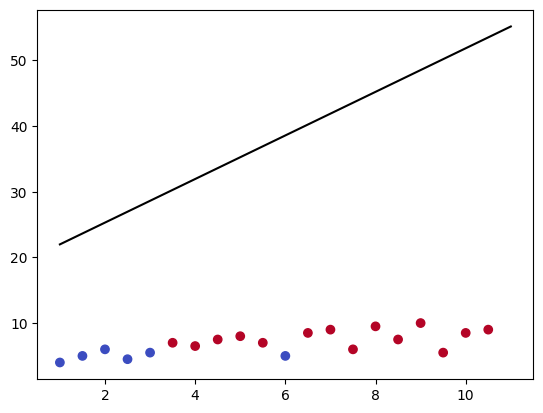

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
x1 = np.linspace(1, 11, 100)
x2 = -(w[0] + w[1] * x1) / w[2]  # Decision boundary line
plt.plot(x1, x2, 'k-')
plt.show()